In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import seaborn as sns
import cv2 as cv

In [2]:
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2.5})

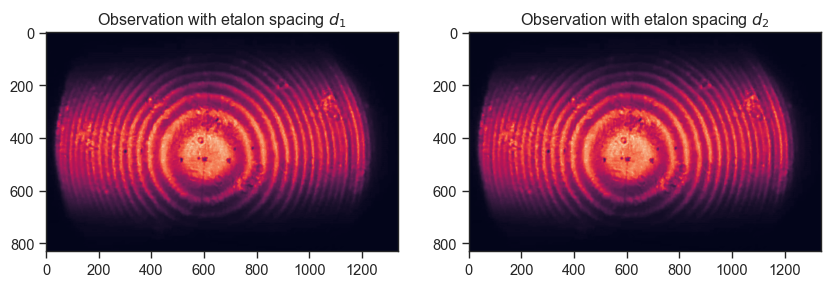

In [3]:
image1 = cv.imread('d1.jpg')[:,:,-1]
image2 = cv.imread('d1.jpg')[:,:,-1]

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
ax[0].imshow(image1)
ax[1].imshow(image2)
ax[0].set_title('Observation with etalon spacing $d_1$')
ax[1].set_title('Observation with etalon spacing $d_2$')

plt.savefig('Observations.pdf', bbox_inches='tight', dpi=300)

In [4]:
def func(x, a, b):
    return a * x + b

Slope= 3.529346085193696 Intercept= -2.2553335266522962


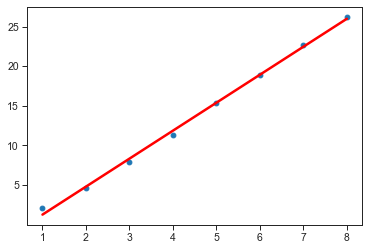

In [45]:
# peaks = [166, 220, 270, 310, 346, 378, 409, 439, 465, 491, 515]
peaks = np.array([64, 169, 220, 269 , 309, 349, 381, 411, 437])
peaks = peaks * (0.7/51)
diff = peaks[1:] - peaks[0]
# 54 pixel = 0.7 mm
orders = np.arange(0, 9)
# reverse the order
# diff = diff[::-1]
plt.plot(orders[1:], diff**2, 'o')

popt, pcov = curve_fit(func, orders[1:], diff**2)
plt.plot(orders[1:], func(orders[1:], *popt), 'r-')
print("Slope=", popt[0], "Intercept=", popt[1])

Slope= 2.921525887970162 Intercept= -3.2016696154280027


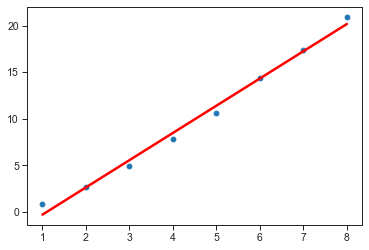

In [47]:
peaks = np.array([174, 234, 284, 322, 360, 391, 427, 452, 479])
peaks = peaks * (0.75/50)
diff1 = peaks[1:] - peaks[0]
# 47 pixel = 0.75 mm
orders = np.arange(0, 9)
plt.plot(orders[1:], diff1**2, 'o')

popt1, pcov1 = curve_fit(func, orders[1:], diff1**2)
plt.plot(orders[1:], func(orders[1:], *popt1), 'r-')
print("Slope=", popt1[0], "Intercept=", popt1[1])

Slope= 3.5442063949762916 +/- 0.06893818709428355  Intercept= -2.0107035755478666
Slope= 2.940594642861375 +/- 0.10751689988955596  Intercept= -3.1626321428662205


Text(0, 0.5, 'Radius Square of Fringe ring, $\\chi^2_n$ (cm)$^2$')

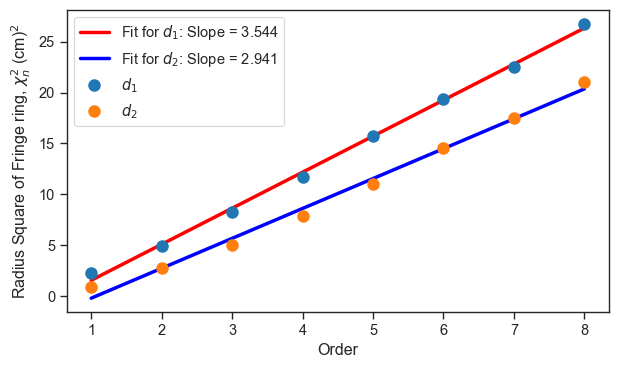

In [38]:
peak1 = np.array([60, 169, 221, 269 , 309, 349, 381, 406, 437])
peak2 = np.array([173, 234, 284, 322, 360, 394, 427, 452, 479])
# print((peak1* (0.7/51))**2)
# print((peak2* (0.75/50))**2)


peak1 = (peak1[1:] - peak1[0]) * (0.7/51)
peak2 = (peak2[1:] - peak2[0]) * (0.75/50)

# subtract 1st peak from second, second from third and so on
# peak1 = np.diff(peak1)* (0.7/51)
# peak2 = np.diff(peak2) * (0.75/50)

order1 = np.arange(1, 9)
order2 = np.arange(1, 9)

popt2, pcov2 = curve_fit(func, order1, peak1**2)
popt3, pcov3 = curve_fit(func, order2, peak2**2)
perr2 = np.sqrt(np.diag(pcov2))
perr3 = np.sqrt(np.diag(pcov3))
print("Slope=", popt2[0],"+/-",perr2[0], " Intercept=", popt2[1])
print("Slope=", popt3[0],"+/-",perr3[0], " Intercept=", popt3[1])

plt.figure(figsize=(7, 4), dpi=100)
plt.plot(order1, func(order1, *popt2), 'r-', label='Fit for $d_1$: Slope = %.3f'%popt2[0])
plt.plot(order2, func(order2, *popt3), 'b-', label='Fit for $d_2$: Slope = %.3f'%popt3[0])
plt.plot(order1, peak1**2, label='$d_1$', ms=8, ls='', marker='o') 
plt.plot(order2, peak2**2, label='$d_2$', ms=8, ls='', marker='o') 
plt.legend()

plt.xlabel('Order')
plt.ylabel('Radius Square of Fringe ring, $\chi^2_n$ (cm)$^2$')
# plt.savefig('fringe.pdf', dpi=300, bbox_inches='tight')

In [36]:
D = 51.75*1e-2
l = 652*(1e-6)

d1 = D**2 * l/(popt2[0]*1e-5)
d2 = D**2 * l/(popt3[0]*1e-5)
print(d1)
print(d2)

print((d2 - d1))

4.92662264950199
5.937903594563251
1.0112809450612605


In [40]:
c = 3e8
f1 = (c/d1)*1e3
f2 = (c/d2)*1e3
print(f1, f2)

60893642834.67613 50522881556.15733


In [5]:
S = 0.5944148936161366*1e-6
D = 517.5*(1e-6)
l = 652*(1e-6)

d2 = D**2 * l/S

print(d2)

0.0002937505046984237


In [6]:
S = 0.5758490566028484*1e-6
d1 = D**2 * l/S

print(d1)
print(d2 - d1)

0.00030322125737270215
-9.470752674278456e-06


4.764761140688371e-05
5.2652637375620703e-05
